In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import os


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import random

In [2]:
data1 = pd.read_csv('E0 1819.csv')

In [3]:
data1

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15


In [4]:
dataframes = [data1]

for ind, data in enumerate(dataframes):
    data['Season'] = "{}/{}".format(18 - ind, 19 - ind)

col_list = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS',
            'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'Season']

all_data = pd.concat(dataframes, sort='False')
all_data = all_data[col_list]

def result(HG, AG):
    if HG > AG:
        return -1
    elif HG == AG:
        return 0
    elif HG < AG:
        return 1

all_data['Result'] = all_data.apply(lambda row: result(row.FTHG, row.FTAG), axis = 1) 
print(all_data.shape)
all_data

(380, 18)


C:\Users\harsh\AppData\Local\Temp\ipykernel_53560\3507326172.py:9: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  all_data = pd.concat(dataframes, sort='False')


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,Season,Result
0,Man United,Leicester,2,1,H,1,0,H,8,13,6,4,11,8,2,5,18/19,-1
1,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,4,1,11,9,7,4,18/19,-1
2,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,6,9,9,11,5,5,18/19,1
3,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,1,4,9,8,2,5,18/19,1
4,Newcastle,Tottenham,1,2,A,1,2,A,15,15,2,5,11,12,3,5,18/19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolves,2,0,H,1,0,H,13,7,5,2,3,11,4,1,18/19,-1
376,Man United,Cardiff,0,2,A,0,1,A,26,13,10,4,9,6,11,2,18/19,1
377,Southampton,Huddersfield,1,1,D,1,0,H,10,10,3,3,8,6,4,3,18/19,0
378,Tottenham,Everton,2,2,D,1,0,H,11,17,3,9,10,13,7,4,18/19,0


In [5]:
home_data = all_data.groupby('HomeTeam').sum()
away_data = all_data.groupby('AwayTeam').sum()
home_data['HAS'] = home_data['FTHG'] / 19 # Home Average Scores
home_data['HAC'] = home_data['FTAG'] / 19 # Home Average Conceded
away_data['AAS'] = away_data['FTAG'] / 19 # Away average Scored
away_data['AAC'] = away_data['FTHG'] / 19 # Away Average Conceded
all_data_backup = all_data
all_data
team_data = pd.DataFrame()
team_data['Team'] = home_data.index

team_data = team_data.merge(home_data['HAS'], left_on='Team', right_index=True)
team_data = team_data.merge(home_data['HAC'], left_on='Team', right_index=True)
# team_data = team_data.merge(home_data['HS'], left_on='Team', right_index=True)
# team_data = team_data.merge(home_data['AS'], left_on='Team', right_index=True)

# team_data['AHSH'] = team_data['HS'] / 19 # Average Home Shots Hit
# team_data['AAST'] = team_data['AS'] / 19 # Average Away Shots Taken
# team_data = team_data.drop(['HS', 'AS'], axis=1)

team_data = team_data.merge(away_data['AAS'], left_on='Team', right_index=True)
team_data = team_data.merge(away_data['AAC'], left_on='Team', right_index=True)
# team_data = team_data.merge(away_data['AS'], left_on='Team', right_index=True)
# team_data = team_data.merge(away_data['HS'], left_on='Team', right_index=True)

# team_data['AASH'] = team_data['AS'] / 19 # Average Away Shots Hit
# team_data['AHST'] = team_data['HS'] / 19 # Average Home Shots Taken
# team_data = team_data.drop(['AS', 'HS'], axis=1)


team_data.set_index("Team", inplace=True)
last_season_table= pd.DataFrame(index=team_data.index)
scaler = MinMaxScaler()
team_data = pd.DataFrame(scaler.fit_transform(team_data), columns=team_data.columns, index=team_data.index)
team_data

C:\Users\harsh\AppData\Local\Temp\ipykernel_53560\1191150637.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_data = all_data.groupby('HomeTeam').sum()
C:\Users\harsh\AppData\Local\Temp\ipykernel_53560\1191150637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away_data = all_data.groupby('AwayTeam').sum()


,HAS,HAC,AAS,AAC
Team,,,,
Arsenal,0.680851,0.214286,0.730769,0.705882
Bournemouth,0.425532,0.535714,0.538462,1.000000
Brighton,0.191489,0.642857,0.153846,0.617647
Burnley,0.297872,0.785714,0.346154,0.735294
Cardiff,0.234043,1.000000,0.038462,0.588235
Chelsea,0.617021,0.071429,0.461538,0.470588
Crystal Palace,0.191489,0.464286,0.769231,0.558824
Everton,0.425532,0.392857,0.461538,0.411765
Fulham,0.255319,0.928571,0.000000,1.000000


In [6]:


col_list2 = ['HomeTeam', 'AwayTeam']
data_prep = all_data[col_list2]

data_prep = data_prep.merge(team_data['HAS'], left_on='HomeTeam', right_index=True, how='left')
data_prep = data_prep.merge(team_data['HAC'], left_on='HomeTeam', right_index=True, how='left') 
data_prep = data_prep.merge(team_data['AAS'], left_on='AwayTeam', right_index=True, how='left') 
data_prep = data_prep.merge(team_data['AAC'], left_on='AwayTeam', right_index=True, how='left') 

# data_prep = data_prep.merge(team_data['AHSH'], left_on='HomeTeam', right_index=True, how='left') 
# data_prep = data_prep.merge(team_data['AHST'], left_on='HomeTeam', right_index=True, how='left') 

# data_prep = data_prep.merge(team_data['AASH'], left_on='AwayTeam', right_index=True, how='left') 
# data_prep = data_prep.merge(team_data['AAST'], left_on='AwayTeam', right_index=True, how='left') 

# data_prep['HAtS'] = data_prep['HAS'] * data_prep['AAC'] * data_prep['AHSH'] * data_prep['AAST']; # Home Attack Strength
# data_prep['AAtS'] = data_prep['HAC'] * data_prep['AAS'] * data_prep['AHST'] * data_prep['AASH']; # Away Attack Strength

data_prep['HAtS'] = (data_prep['HAS'] * data_prep['AAC']); # Home Attack Strength
data_prep['AAtS'] = (data_prep['HAC'] * data_prep['AAS']); # Away Attack Strength

print(data_prep.shape)

data_prep = data_prep.merge(all_data['Result'], left_index=True, right_index=True)

fixture_list = data_prep
data_prep



(380, 8)


,HomeTeam,AwayTeam,HAS,HAC,AAS,AAC,HAtS,AAtS,Result
0,Man United,Leicester,0.489362,0.535714,0.576923,0.500000,0.244681,0.309066,-1
1,Bournemouth,Cardiff,0.425532,0.535714,0.038462,0.588235,0.250313,0.020604,-1
2,Fulham,Crystal Palace,0.255319,0.928571,0.769231,0.558824,0.142678,0.714286,1
3,Huddersfield,Chelsea,0.000000,0.750000,0.461538,0.470588,0.000000,0.346154,1
4,Newcastle,Tottenham,0.297872,0.535714,0.807692,0.352941,0.105131,0.432692,1
...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolves,0.957447,0.000000,0.269231,0.411765,0.394243,0.000000,-1
376,Man United,Cardiff,0.489362,0.535714,0.038462,0.588235,0.287860,0.020604,1
377,Southampton,Huddersfield,0.361702,0.714286,0.000000,1.000000,0.361702,0.000000,0
378,Tottenham,Everton,0.510638,0.214286,0.461538,0.411765,0.210263,0.098901,0


In [7]:
rm_col_list = ['HomeTeam','AwayTeam']
col_list = data_prep.columns.values.tolist()
col_list = [x for x in col_list if x not in rm_col_list]

to_use = data_prep[col_list]
X = [x for x in col_list if x != 'Result']
Y = [x for x in col_list if x == 'Result']

to_use

,HAS,HAC,AAS,AAC,HAtS,AAtS,Result
0,0.489362,0.535714,0.576923,0.500000,0.244681,0.309066,-1
1,0.425532,0.535714,0.038462,0.588235,0.250313,0.020604,-1
2,0.255319,0.928571,0.769231,0.558824,0.142678,0.714286,1
3,0.000000,0.750000,0.461538,0.470588,0.000000,0.346154,1
4,0.297872,0.535714,0.807692,0.352941,0.105131,0.432692,1
...,...,...,...,...,...,...,...
375,0.957447,0.000000,0.269231,0.411765,0.394243,0.000000,-1
376,0.489362,0.535714,0.038462,0.588235,0.287860,0.020604,1
377,0.361702,0.714286,0.000000,1.000000,0.361702,0.000000,0
378,0.510638,0.214286,0.461538,0.411765,0.210263,0.098901,0


In [8]:
X_data = to_use.drop('Result', axis=1)
Y_data = to_use['Result']

model = LogisticRegression(max_iter=10000)
model.fit(X_data, Y_data)
model.score(X_data, Y_data)

0.6342105263157894

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [10]:
predicted = model1.predict(X_test)
predicted


acc_score = accuracy_score(Y_test, predicted)
print("Accuracy score: " + str(acc_score))
scores = cross_val_score(model1, X_train, Y_train, cv=10)
print("Cross val scores")
print(scores)

print(classification_report(Y_test, predicted))




Accuracy score: 0.6578947368421053
Cross val scores
[0.58064516 0.67741935 0.64516129 0.70967742 0.53333333 0.63333333
 0.63333333 0.6        0.6        0.6       ]
              precision    recall  f1-score   support

          -1       0.66      0.81      0.73        36
           0       0.00      0.00      0.00        13
           1       0.66      0.78      0.71        27

    accuracy                           0.66        76
   macro avg       0.44      0.53      0.48        76
weighted avg       0.55      0.66      0.60        76



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
score_train = model1.score(X_train, Y_train)
score_test = model1.score(X_test, Y_test)

print("Training set accuracy: ", '%.3f'%(score_train))
print("Test set accuracy: ", '%.3f'%(score_test))

Training set accuracy:  0.635
Test set accuracy:  0.658


In [12]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """

    score = accuracy_score(y_true,y_predict)

    return score



def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeClassifier(random_state=42)
    params = {'max_depth':[10,15,16,17,18,19,20,25,30,40,50,70,100]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)


    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [13]:
cls = fit_model(X_train, Y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(cls.get_params()['max_depth']))
cls.get_params()


Parameter 'max_depth' is 10 for the optimal model.


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [14]:
cls = DecisionTreeClassifier(max_depth=cls.get_params()['max_depth'])
cls.fit(X_train, Y_train)
Y_pred = cls.predict(X_test)
y_pred_prob = cls.predict_proba(X_test)

print("Accuracy score for the optimal model is {}.".format(accuracy_score(Y_test,Y_pred)))

models_dict={}
models_dict.update({'DT1':accuracy_score(Y_test,Y_pred)})

print(classification_report(Y_test,Y_pred))



Accuracy score for the optimal model is 0.5921052631578947.
              precision    recall  f1-score   support

          -1       0.69      0.69      0.69        36
           0       0.18      0.15      0.17        13
           1       0.62      0.67      0.64        27

    accuracy                           0.59        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.58      0.59      0.59        76



[Text(0.549137443438914, 0.9545454545454546, 'X[4] <= 0.182\ngini = 0.626\nsamples = 304\nvalue = [145, 58, 101]'),
 Text(0.2719174208144796, 0.8636363636363636, 'X[5] <= 0.272\ngini = 0.585\nsamples = 140\nvalue = [34, 27, 79]'),
 Text(0.16544117647058823, 0.7727272727272727, 'X[3] <= 0.441\ngini = 0.663\nsamples = 64\nvalue = [23, 18, 23]'),
 Text(0.057126696832579184, 0.6818181818181818, 'X[4] <= 0.009\ngini = 0.648\nsamples = 32\nvalue = [10, 14, 8]'),
 Text(0.027149321266968326, 0.5909090909090909, 'X[5] <= 0.208\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(0.01809954751131222, 0.5, 'X[2] <= 0.25\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.00904977375565611, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.027149321266968326, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.03619909502262444, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.08710407239819004, 0.5909090909090909, 'X[4] <= 0.086\ngi

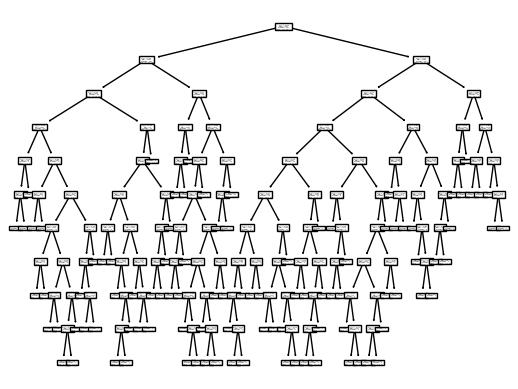

In [15]:
tree.plot_tree(cls)

In [16]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(classification_report(Y_test,pred))


              precision    recall  f1-score   support

          -1       0.62      0.89      0.73        36
           0       0.17      0.08      0.11        13
           1       0.67      0.44      0.53        27

    accuracy                           0.59        76
   macro avg       0.48      0.47      0.46        76
weighted avg       0.56      0.59      0.55        76



In [17]:
acc_score = accuracy_score(Y_test, pred)
acc_score

0.5921052631578947

Text(0, 0.5, 'Error Rate')

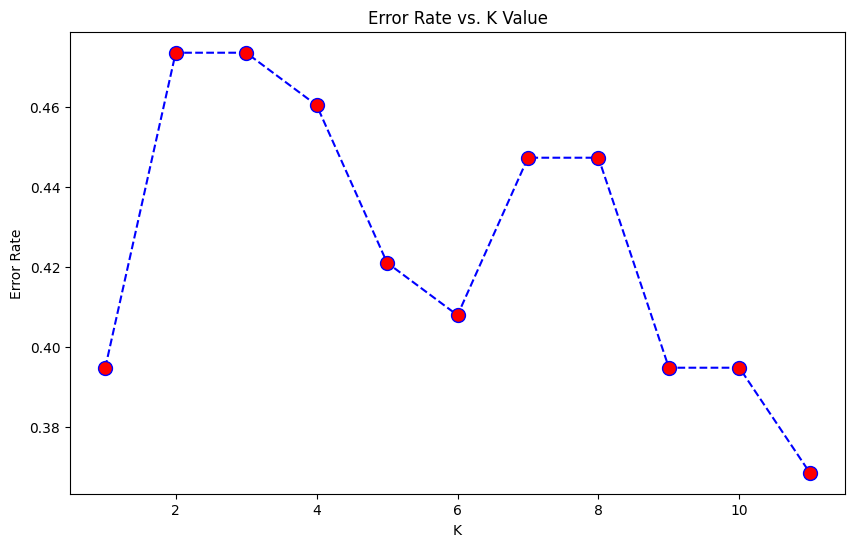

In [18]:
error_rate = []
# Might take some time
for i in range(1,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')